<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2025-2</h1>

<h2>Evelyn Venegas Agustín</h2> 

---
### Profesor Sergio Alcalá Corona
Práctica 3
---

#### 1. Grafica de datos experimentales
# Análisis de Manchas Solares

El archivo `manchasolares.txt` contiene el número observado de manchas solares en el Sol en cada mes desde enero de 1749. El archivo tiene dos columnas de números: la primera es el mes y la segunda es el número de manchas solares.

a) Escribe un programa que lea los datos y haga una grafica de las manchas solares en funcion del tiempo.

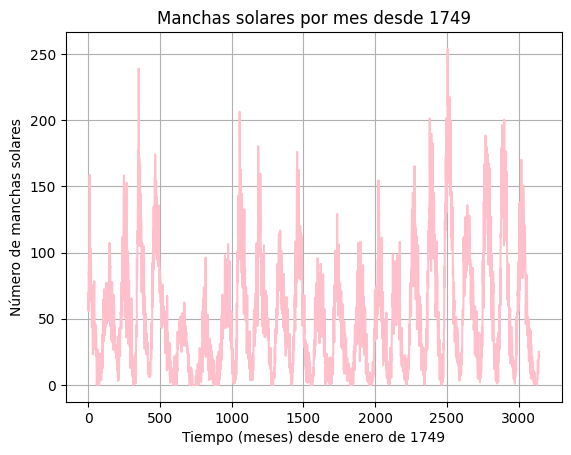

In [25]:
import matplotlib.pyplot as plt
import numpy as np

#Primero vamos a crear un array con los datos del archivo

manchasolares = np.loadtxt('manchasolares.txt')

#Ahora, creamos dos arrays separados para el tiempo y el número de manchas solares

tiempo= manchasolares[:,0]

numero_manchas= manchasolares[:,1]

#Con esto, vamos a graficar los datos 

plt.plot(tiempo, numero_manchas, color='pink', label='Manchas solares')
plt.xlabel('Tiempo (meses) desde enero de 1749')
plt.ylabel('Número de manchas solares')
plt.title('Manchas solares por mes desde 1749')
plt.grid()

b) Modifica tu programa para mostrar solo los primeros 1000 datos (experimentales) en la gráfica.

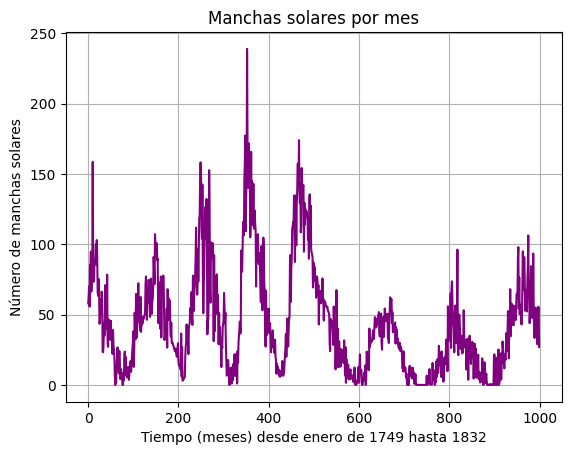

In [26]:
#Guardamos otro array con los primeros 1000 datos y repetimos lo anterior

manchasolares1000= manchasolares[:1000]

tiempo1000= manchasolares1000[:,0]
manchas1000= manchasolares1000[:,1]

#Y graficamos

plt.plot(tiempo1000, manchas1000, color='purple', label='Manchas solares primeros 1000 datos')
plt.xlabel('Tiempo (meses) desde enero de 1749 hasta 1832')
plt.ylabel('Número de manchas solares')
plt.title('Manchas solares por mes')
plt.grid()


c) Modifica nuevamente tu programa para calcular y graficar la media (promedio) móvil de los datos, definida por:

$$

Y_k = \frac{1}{2r+1} \sum_{m=-r}^{r} y_{k+m}

$$

donde $r = 5$ (en este caso) y $y_k$ son los numeros de manchas solares.  ́

El programa debe graficar tanto los datos originales como la media móvil en el mismo grafico, sólo sobre los primeros 1000 datos.

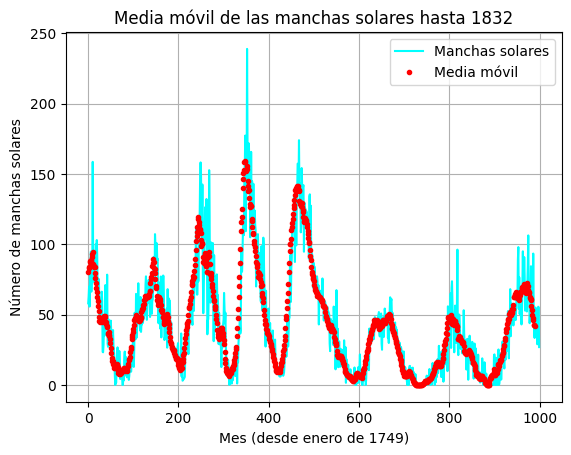

In [27]:
# Definimos la función para calcular la media móvil
def mediamovil(arreglo, r):
    medias_moviles = [] #creamos un array vacío para guardar las medias móviles
    arreglotmp = arreglo[r:len(arreglo)-r] #quitamos los primeros y últimos r elementos para que esté bien definida
    for i in range(len(arreglotmp)):
        y_k = (1/(2*r+1)) * np.sum(arreglo[i:i+2*r+1]) #a cada elemento del nuevo arreglo le aplicamos la fórmula
        medias_moviles.append(y_k)
    return medias_moviles

#Ahora, creamos la gráfica y los "ejes" para cada línea
fig, ax = plt.subplots()
ax.plot(manchas1000, label='Manchas solares', color='cyan')
ax.plot(mediamovil(manchas1000, 5), '.', label='Media móvil', color='red')

ax.legend()
ax.set_title('Media móvil de las manchas solares hasta 1832')
ax.set_xlabel('Mes (desde enero de 1749)')
ax.set_ylabel('Número de manchas solares')
plt.grid()

plt.show()


#### Ejercicio 2

a) Grafica la llamada curva deltoide, definida paramétricamente por las ecuaciones:

$$
x = 2 \cos(\theta) + \cos(2\theta), \quad y = 2 \sin(\theta) - \sin(2\theta),
$$

donde $0 \leq \theta < 2\pi$. Toma un conjunto de valores para $\theta$ entre 0 y $2\pi$ y calcula
$x(\theta)$ e $y(\theta)$ usando las ecuaciones anteriores, para posteriormente graficar y como función de x.


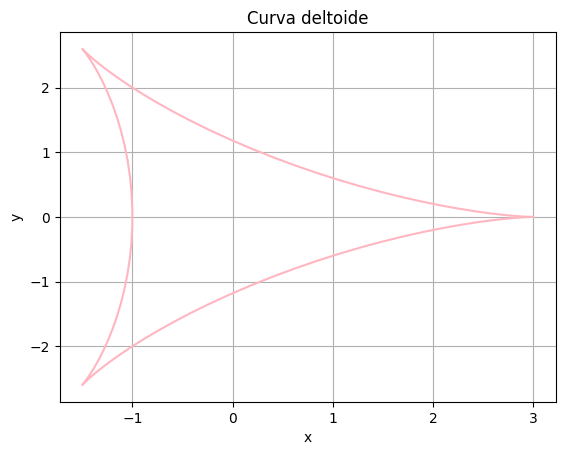

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
#Definimos un parámtro, en este caso theta, de forma discreta

theta= np.linspace(0,2*pi,100)

x= 2*np.cos(theta) + np.cos(2*theta)
y= 2*np.sin(theta) - np.sin(2*theta)

plt.plot(x,y, color='lightpink')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curva deltoide')
plt.grid()

b) Usando este mismo enfoque, se puede hacer una gráfica polar $r = f(\theta)$ para alguna función $f$ calculando $r$ para un rango de valores de $\theta$ y luego convirtiendo $r$ y $\theta$ a coordenadas cartesianas usando las ecuaciones estándar:

$$
x = r \cos(\theta), \quad y = r \sin(\theta)
$$

Utiliza este método para trazar la espiral Galileana $r = \theta^2$ para $0 \leq \theta \leq 10\pi$.


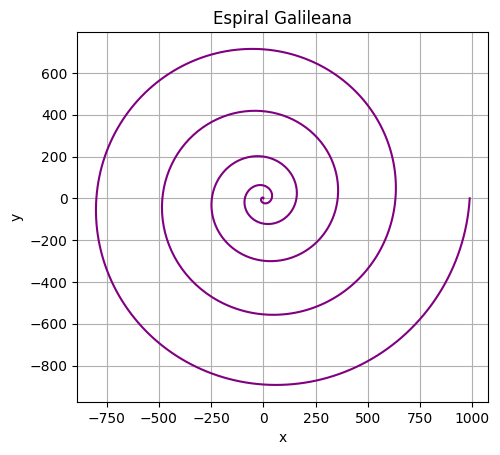

In [29]:
#de la misma forma, creamos un parámetro que vaya de 0 a 10pi

theta2= np.linspace(0,10*pi,1000)

#definimos x e y usando el parámetro y la igualdad que nos da el inciso

x2= (theta2**2)*np.cos(theta2)
y2= (theta2**2)*np.sin(theta2)

#y graficamos

plt.plot(x2,y2, color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Espiral Galileana')
plt.grid()
plt.gca().set_aspect('equal')

c) Con el mismo método, haz una gráfica polar de la “función de Fey”:

$$
r = e^{\cos(\theta)} - 2 \cos(4\theta) + \frac{\sin^5(\theta)}{12}
$$

en el rango $0 \leq \theta \leq 24\pi$.


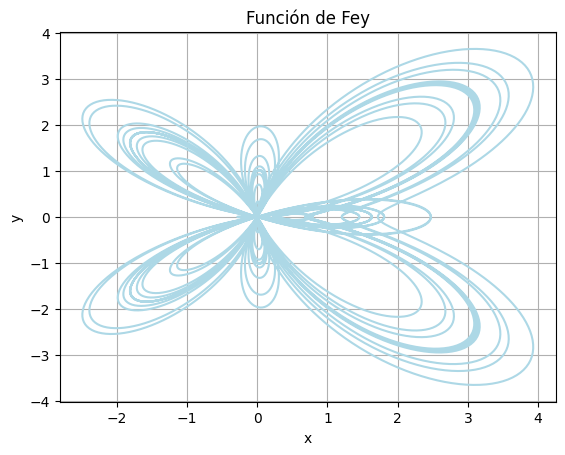

In [30]:
#redefinimos el parámetro

theta3= np.linspace(0,24*pi,5000)

#y definimos x e y

x3= (np.exp(np.cos(theta3)) - 2*np.cos(4*theta3) + ((np.sin(theta3/12))**5))*np.cos(theta3)
y3= (np.exp(np.cos(theta3)) - 2*np.cos(4*theta3) + ((np.sin(theta3/12))**5))*np.sin(theta3)

#graficamos

plt.plot(x3,y3, color='lightblue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función de Fey')
plt.grid()

#### Ejercicio 3

a) Apoyate en el programa que vimos en clase y escribe un programa que muestre el comportamiento del mapeo logístico mediante una gráfica.

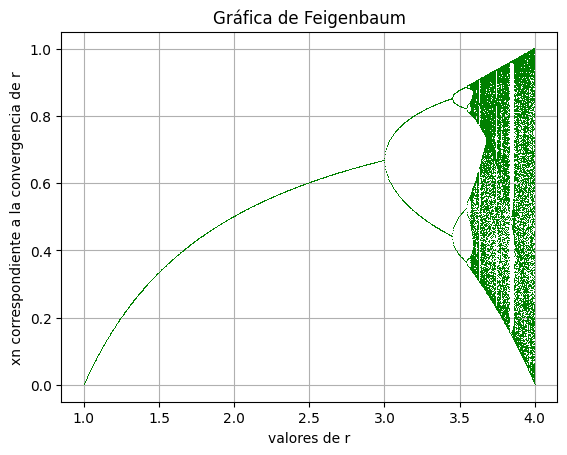

In [31]:
import numpy as np
import matplotlib.pyplot as plt
#definimos la función de iteración

def iteracion(r,x0,it): #entra la razón (r), el valor inicial (xn) y el número de iteraciones (it)
        xn=x0
        array=[]
        n_elemento=0 #inicializamos un contador para considerar solo los elementos que nos interesan
        
        for i in range(0,it+1):
            xn= r*xn*(1-xn)
            n_elemento+=1
            if n_elemento>=it-200  : #solo guardamos los últimos 200 elementos
                array.append(xn)
        return array

r= np.linspace(1,4,1000) #definimos un array con valores de r

#ahora, vamos a iterar tanto r como xn con un for anidado

A=[] #aquí vamos a guardar las iteraciones que hagamos

for j in r:
    for i in iteracion(j,0.5,2000):
       A.append([j,i])


R= [] #aquí vamos a guardar las iteraciones de r
Xn= [] #aquí vamos a guardar las iteraciones de xn

#llenamos los arrays con los datos de A
for i in A: #tomamos cada pareja [r,x] y guardaremos todos los valores de r y todos los valores de x
    R.append(i[0]) 
    Xn.append(i[1])
#y graficamos

plt.plot(R,Xn,"g,")
plt.xlabel("valores de r")
plt.ylabel("xn correspondiente a la convergencia de r")
plt.title("Gráfica de Feigenbaum")
plt.grid()
plt.show()

b) De acuerdo a tu gráfica, ¿a qué valor de $r$ el sistema pasa de un comportamiento ordenado (puntos fijos o ciclos límite) a un comportamiento caótico? A este punto a veces se le llama “el borde del caos”.

Como vimos en clase, esto sucede alrededor del 3.6, cuando en lugar de converger a un o unos valores visiblemente predecibles, el sistema parece "enloquecer" y volverse aparentemente aleatorio. Sabemos que no es así, pues la convergencia está determinada por una fórmula, pero ya no tiene un patrón tan visible.